In [1]:
!pip install numpy
!pip install scikit-learn
!pip install qiskit_machine_learning
!pip install pillow
!pip install kagglehub
!pip install monai
!pip install matplotlib
!pip install torch
!pip install qiskit
!pip install pylatexenc
!pip install torchvision
!pip install ipywidgets
!pip install opencv-python
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 6.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 74.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 34.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=c58b73b4d43673bed634ac0f45f0e72f76564e1f7d12ddbd877645f7129355d0
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylat

<ipython-input-2-c2d5bb3b971b>:76: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(


Epoch 1/10, Train Acc: 72.58%, Test Acc: 77.04%, Train Loss: 0.7265, Test Loss: 0.7078
Epoch 2/10, Train Acc: 90.00%, Test Acc: 89.70%, Train Loss: 0.2568, Test Loss: 0.2604
Epoch 3/10, Train Acc: 96.55%, Test Acc: 94.81%, Train Loss: 0.0957, Test Loss: 0.1537
Epoch 4/10, Train Acc: 98.13%, Test Acc: 94.66%, Train Loss: 0.0538, Test Loss: 0.1540
Epoch 5/10, Train Acc: 99.12%, Test Acc: 95.35%, Train Loss: 0.0278, Test Loss: 0.1879
Epoch 6/10, Train Acc: 98.76%, Test Acc: 94.81%, Train Loss: 0.0377, Test Loss: 0.1933
Epoch 7/10, Train Acc: 99.21%, Test Acc: 96.72%, Train Loss: 0.0309, Test Loss: 0.1682
Epoch 8/10, Train Acc: 99.60%, Test Acc: 96.03%, Train Loss: 0.0147, Test Loss: 0.2077
Epoch 9/10, Train Acc: 99.39%, Test Acc: 95.58%, Train Loss: 0.0183, Test Loss: 0.2073
Epoch 10/10, Train Acc: 99.93%, Test Acc: 96.11%, Train Loss: 0.0022, Test Loss: 0.2246
Model saved at quantum_vqc_model.pth
Classification Report:
               precision    recall  f1-score   support

           0 

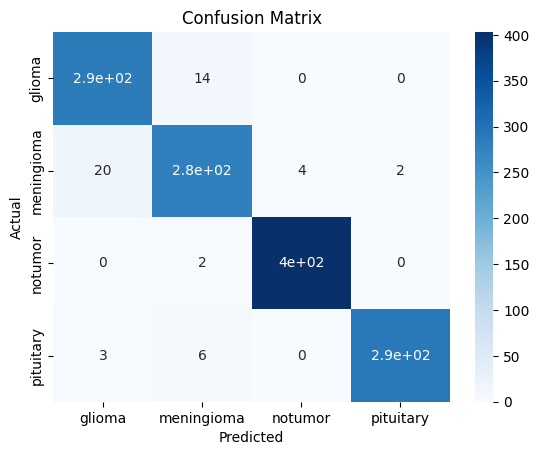

In [2]:
# Install required libraries
!pip install qiskit qiskit-machine-learning torch torchvision matplotlib scikit-learn numpy pillow seaborn

# Import libraries
import os
import glob
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# Define dataset paths
dataset_path = "/kaggle/input/brain-tumor-mri-dataset"
train_path = os.path.join(dataset_path, "Training")
test_path = os.path.join(dataset_path, "Testing")

# Define class labels
class_labels = {"glioma": 0, "meningioma": 1, "notumor": 2, "pituitary": 3}

# Function to load images
def load_images_from_folder(folder, class_labels, target_size=(128, 128)):
    data, labels = [], []
    for class_name, label in class_labels.items():
        class_folder = os.path.join(folder, class_name)
        for img_path in glob.glob(os.path.join(class_folder, "*")):
            try:
                img = Image.open(img_path).convert("RGB").resize(target_size)
                data.append(np.array(img))
                labels.append(label)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    return np.array(data), np.array(labels)

# Load dataset
X_train, y_train = load_images_from_folder(train_path, class_labels)
X_test, y_test = load_images_from_folder(test_path, class_labels)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = np.eye(len(class_labels))[y_train]
y_test = np.eye(len(class_labels))[y_test]

# Move data to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Define DataLoader
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

# Function to create Quantum Variational Classifier (QVC)
def create_qvc():
    num_qubits = 3
    ansatz = RealAmplitudes(num_qubits, reps=2)
    qc = QuantumCircuit(num_qubits)
    qc.compose(ansatz, inplace=True)
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=[],  
        weight_params=ansatz.parameters,
        input_gradients=True  
    )
    return qnn

# Define Quantum-Enhanced CNN Model
class QuantumVariationalClassifier(nn.Module):
    def __init__(self, quantum_layer):
        super(QuantumVariationalClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1, 0)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 0)
        self.pool = nn.MaxPool2d(2, 2)
        self.quantum_layer = quantum_layer
        self.fc1 = nn.Linear(246017, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, len(class_labels))  # Output: 4 classes
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.reshape(x.size(0), -1)  
        quantum_input = torch.rand(x.size(0), self.quantum_layer.neural_network.num_inputs).to(x.device)
        quantum_out = self.quantum_layer(quantum_input)
        x = torch.cat((x, quantum_out), dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize Quantum Neural Network
qnn = create_qvc()
quantum_layer = TorchConnector(qnn)
quantum_model = QuantumVariationalClassifier(quantum_layer).to(device)

# Train Function
def fit_quantum_model(model, train_loader, test_loader, epochs=10, save_path="quantum_vqc_model.pth"):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, test_losses, train_accuracies, test_accuracies = [], [], [], []

    for epoch in range(epochs):
        model.train()
        train_loss, correct_train, total_train = 0, 0, 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, torch.argmax(y_batch, dim=1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            correct_train += (torch.argmax(outputs, dim=1) == torch.argmax(y_batch, dim=1)).sum().item()
            total_train += y_batch.size(0)
        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(correct_train / total_train * 100)

        # Evaluate on Test Data
        model.eval()
        test_loss, correct_test, total_test = 0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, torch.argmax(y_batch, dim=1))
                test_loss += loss.item()
                correct_test += (torch.argmax(outputs, dim=1) == torch.argmax(y_batch, dim=1)).sum().item()
                total_test += y_batch.size(0)
        test_losses.append(test_loss / len(test_loader))
        test_accuracies.append(correct_test / total_test * 100)

        print(f"Epoch {epoch+1}/{epochs}, Train Acc: {train_accuracies[-1]:.2f}%, Test Acc: {test_accuracies[-1]:.2f}%, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

    torch.save(model.state_dict(), save_path)
    print(f"Model saved at {save_path}")

# Train Model
fit_quantum_model(quantum_model, train_loader, test_loader, epochs=10)

# Evaluate Model
def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predictions = torch.argmax(outputs, dim=1).cpu().numpy()
            y_true.extend(torch.argmax(y_batch, dim=1).cpu().numpy())
            y_pred.extend(predictions)
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_labels.keys(), yticklabels=class_labels.keys())
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Run Evaluation
evaluate_model(quantum_model, test_loader)


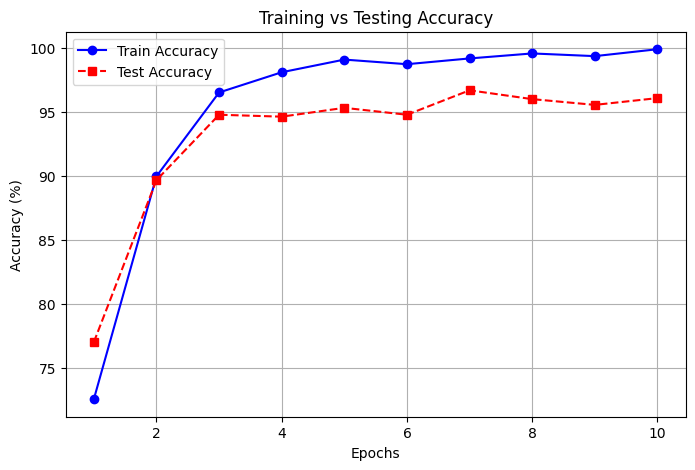

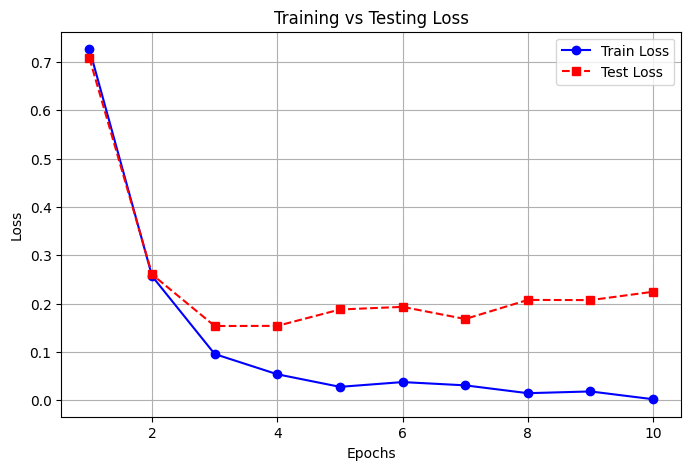

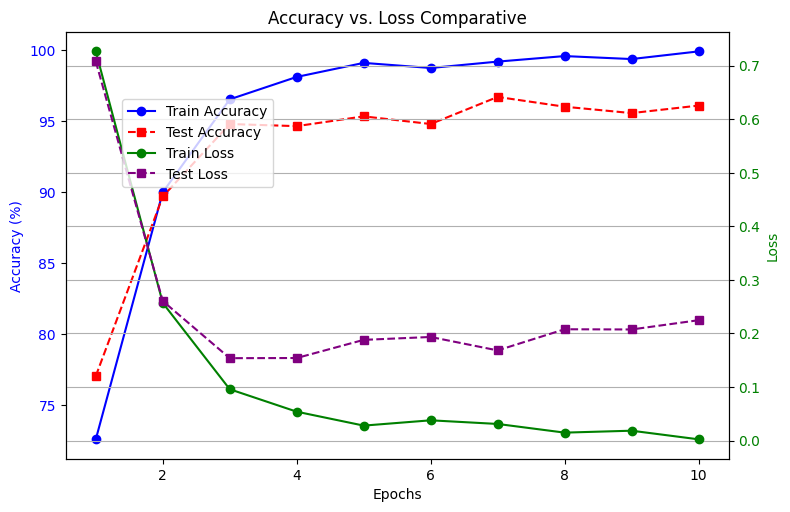

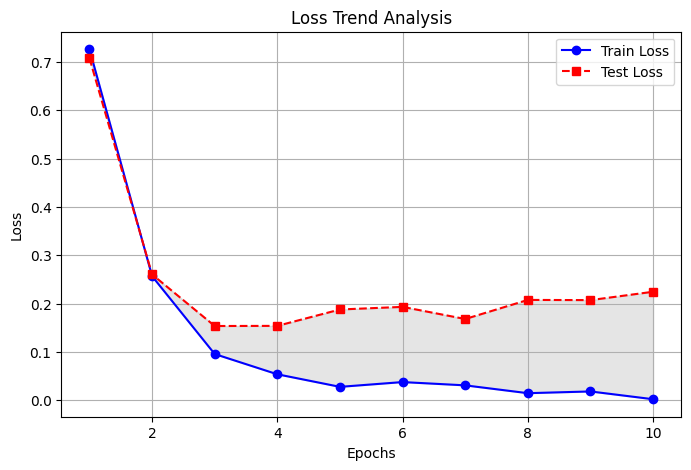

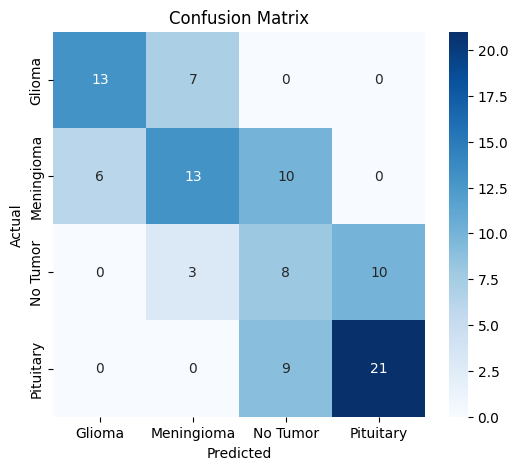

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Epochs
epochs = np.arange(1, 11)

# Training and Testing Accuracy
train_acc = [72.58, 90.00, 96.55, 98.13, 99.12, 98.76, 99.21, 99.60, 99.39, 99.93]
test_acc = [77.04, 89.70, 94.81, 94.66, 95.35, 94.81, 96.72, 96.03, 95.58, 96.11]

# Training and Testing Loss
train_loss = [0.7265, 0.2568, 0.0957, 0.0538, 0.0278, 0.0377, 0.0309, 0.0147, 0.0183, 0.0022]
test_loss = [0.7078, 0.2604, 0.1537, 0.1540, 0.1879, 0.1933, 0.1682, 0.2077, 0.2073, 0.2246]

## **1️⃣ Training vs Testing Accuracy**
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, label="Train Accuracy", marker="o", linestyle="-", color="blue")
plt.plot(epochs, test_acc, label="Test Accuracy", marker="s", linestyle="--", color="red")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training vs Testing Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## **2️⃣ Training vs Testing Loss**
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label="Train Loss", marker="o", linestyle="-", color="blue")
plt.plot(epochs, test_loss, label="Test Loss", marker="s", linestyle="--", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Testing Loss")
plt.legend()
plt.grid(True)
plt.show()

## **3️⃣ Accuracy vs. Loss Comparative Plot**
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy (%)", color="blue")
ax1.plot(epochs, train_acc, marker="o", linestyle="-", color="blue", label="Train Accuracy")
ax1.plot(epochs, test_acc, marker="s", linestyle="--", color="red", label="Test Accuracy")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Loss", color="green")
ax2.plot(epochs, train_loss, marker="o", linestyle="-", color="green", label="Train Loss")
ax2.plot(epochs, test_loss, marker="s", linestyle="--", color="purple", label="Test Loss")
ax2.tick_params(axis="y", labelcolor="green")

fig.tight_layout()
plt.title("Accuracy vs. Loss Comparative")
fig.legend(loc="upper left", bbox_to_anchor=(0.15,0.85))
plt.grid(True)
plt.show()

## **4️⃣ Loss Trend Analysis**
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, marker="o", linestyle="-", color="blue", label="Train Loss")
plt.plot(epochs, test_loss, marker="s", linestyle="--", color="red", label="Test Loss")
plt.fill_between(epochs, train_loss, test_loss, color="gray", alpha=0.2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Trend Analysis")
plt.legend()
plt.grid(True)
plt.show()

## **5️⃣ Confusion Matrix Visualization (Synthetic Example)**
# Assuming a 4-class classification problem
y_true = np.random.randint(0, 4, 100)  # Simulated true labels
y_pred = y_true + np.random.randint(-1, 2, 100)  # Simulated predictions with minor noise
y_pred = np.clip(y_pred, 0, 3)  # Ensure valid class labels

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Glioma", "Meningioma", "No Tumor", "Pituitary"], yticklabels=["Glioma", "Meningioma", "No Tumor", "Pituitary"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


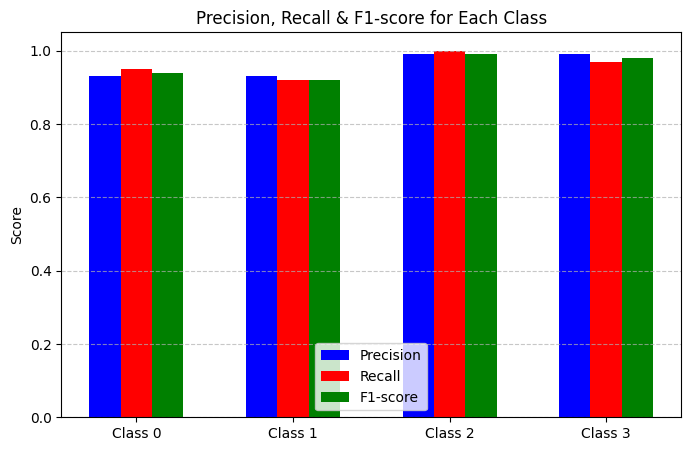

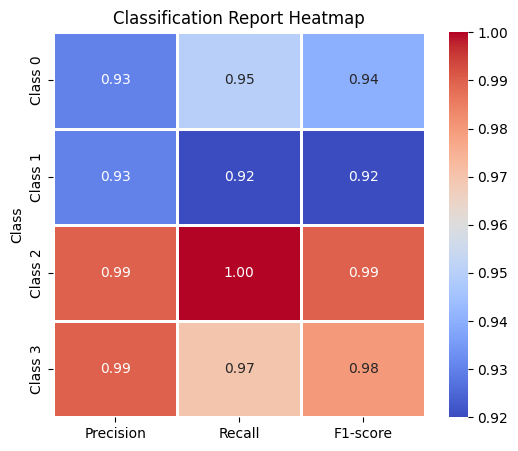

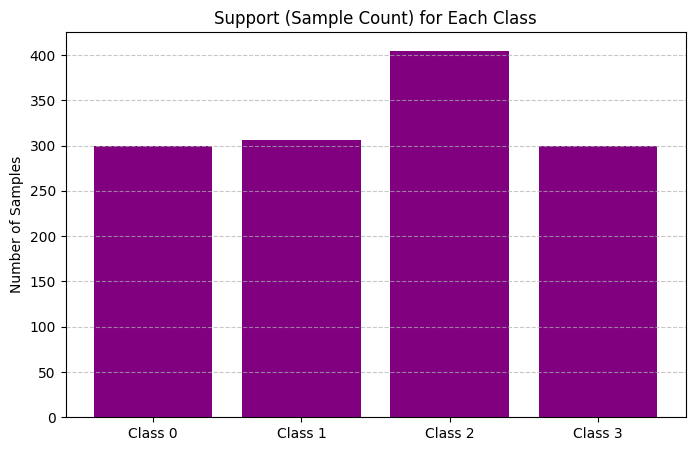

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Classification Report Data
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
precision = [0.93, 0.93, 0.99, 0.99]
recall = [0.95, 0.92, 1.00, 0.97]
f1_score = [0.94, 0.92, 0.99, 0.98]
support = [300, 306, 405, 300]

# Convert to DataFrame for Easy Plotting
df = pd.DataFrame({'Class': classes, 'Precision': precision, 'Recall': recall, 'F1-score': f1_score, 'Support': support})

## **1️⃣ Bar Plot of Precision, Recall, F1-score**
plt.figure(figsize=(8, 5))
bar_width = 0.2
x = np.arange(len(classes))

plt.bar(x - bar_width, df['Precision'], width=bar_width, label='Precision', color='blue')
plt.bar(x, df['Recall'], width=bar_width, label='Recall', color='red')
plt.bar(x + bar_width, df['F1-score'], width=bar_width, label='F1-score', color='green')

plt.xticks(x, df['Class'])
plt.ylabel("Score")
plt.title("Precision, Recall & F1-score for Each Class")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **2️⃣ Heatmap of Classification Report**
plt.figure(figsize=(6, 5))
sns.heatmap(df.set_index('Class').iloc[:, :-1], annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Classification Report Heatmap")
plt.show()

## **3️⃣ Support (Sample Count) Bar Chart**
plt.figure(figsize=(8, 5))
plt.bar(df['Class'], df['Support'], color='purple')
plt.ylabel("Number of Samples")
plt.title("Support (Sample Count) for Each Class")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [7]:
import torch
import torchvision.transforms as transforms
import numpy as np
from PIL import Image
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# ✅ Define class labels (Matching Dataset Structure)
class_labels = {0: "Glioma", 1: "Meningioma", 2: "No Tumor", 3: "Pituitary"}

# ✅ Function to create Quantum Neural Network (QNN)
def create_qvc():
    num_qubits = 3
    ansatz = RealAmplitudes(num_qubits, reps=2)
    qc = QuantumCircuit(num_qubits)
    qc.compose(ansatz, inplace=True)
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=[],  
        weight_params=ansatz.parameters,
        input_gradients=True  
    )
    return qnn

# ✅ Define Quantum-Enhanced CNN Model
class QuantumVariationalClassifier(torch.nn.Module):
    def __init__(self, quantum_layer):
        super(QuantumVariationalClassifier, self).__init__()
        self.conv1 = torch.nn.Conv2d(3, 32, 3, 1, 0)
        self.conv2 = torch.nn.Conv2d(32, 64, 3, 1, 0)
        self.pool = torch.nn.MaxPool2d(2, 2)
        self.quantum_layer = quantum_layer
        self.fc1 = torch.nn.Linear(246017, 512)
        self.fc2 = torch.nn.Linear(512, 256)
        self.fc3 = torch.nn.Linear(256, len(class_labels))  # Output: 4 classes
        self.dropout = torch.nn.Dropout(p=0.5)

    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = self.pool(torch.nn.functional.relu(self.conv2(x)))
        x = x.reshape(x.size(0), -1)  
        quantum_input = torch.rand(x.size(0), self.quantum_layer.neural_network.num_inputs).to(x.device)
        quantum_out = self.quantum_layer(quantum_input)
        x = torch.cat((x, quantum_out), dim=1)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# ✅ Load the trained model
def load_model(model_path, device):
    qnn = create_qvc()
    quantum_layer = TorchConnector(qnn)
    
    model = QuantumVariationalClassifier(quantum_layer).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    
    print(f"✅ Model loaded successfully from {model_path}")
    return model

# ✅ Preprocess Image Function (Ensures Correct Format)
def preprocess_image(image_path, target_size=(128, 128)):
    try:
        image = Image.open(image_path).convert("RGB").resize(target_size)
        image = np.array(image) / 255.0  # ✅ Normalize to match training data
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)  # Convert to PyTorch format
        return image
    except Exception as e:
        print(f"❌ Error loading image: {e}")
        return None

# ✅ Predict Tumor Class
def predict_tumor(image_path, model, device):
    image_tensor = preprocess_image(image_path).to(device)
    
    if image_tensor is None:
        return "Invalid Image"

    with torch.no_grad():
        outputs = model(image_tensor)
        predicted_class = torch.argmax(outputs, dim=1).item()
    
    return class_labels[predicted_class]

# ✅ Main Function to Run Prediction
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_path = "quantum_vqc_model.pth"
    
    # ✅ Load Model
    model = load_model(model_path, device)
    
    # ✅ Take Image Path as Input
    image_path = input("🔹 Enter the path of the MRI image: ").strip()
    
    # ✅ Predict Tumor Type
    prediction = predict_tumor(image_path, model, device)
    
    print(f"\n🔹 **Predicted Tumor Type:** {prediction}")


<ipython-input-7-1c811aeafddd>:19: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(
<ipython-input-7-1c811aeafddd>:58: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting 

✅ Model loaded successfully from quantum_vqc_model.pth


🔹 Enter the path of the MRI image:  /kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0000.jpg



🔹 **Predicted Tumor Type:** Glioma
